<a href="https://colab.research.google.com/github/joaohnt/estudo_ml/blob/main/reinforced_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import gym
import random
import os
import numpy as np
from time import sleep
os.environ["SDL_VIDEODRIVER"] = "dummy"
gym.__version__

'0.17.3'

In [1]:
!pip uninstall gym

Found existing installation: gym 0.17.3
Uninstalling gym-0.17.3:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/gym-0.17.3.dist-info/*
    /usr/local/lib/python3.11/dist-packages/gym/*
Proceed (Y/n)? y
  Successfully uninstalled gym-0.17.3


In [4]:
!pip install gym==0.17.3

  Using cached gym-0.17.3-py3-none-any.whl


# config do ambiente

In [8]:
env = gym.make('Taxi-v3')

In [10]:
env.reset()

231

In [11]:
print(env.render())      # o taxi(ponto amarelo) tem q ir ate o g e fazer uma rota ate a posicao r, a barrina é obstaculo etcetc

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

None


In [12]:
print(env.action_space)  # pode fazer 6 movimentos
# 0 = south
# 1 = north
# 2 = east
# 3 = west
# 4 = pickup
# 5 = dropoff

Discrete(6)


In [13]:
print(env.observation_space) # (5*5*5*4)

Discrete(500)


In [14]:
env.P[430] # 1 - probabilidade, 2 - proximo estado
           # 3 - recompensa, 4 - se levou o passageiro ao ponto final

{0: [(1.0, 430, -1, False)],
 1: [(1.0, 330, -1, False)],
 2: [(1.0, 450, -1, False)],
 3: [(1.0, 430, -1, False)],
 4: [(1.0, 430, -10, False)],
 5: [(1.0, 430, -10, False)]}

# treinamento

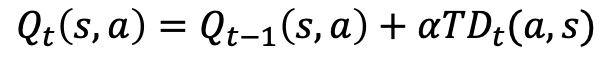

In [15]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape        # 500 linhas = cada um dos movimentos
                     # 6 colunas = cada uma das acoes

(500, 6)

In [16]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [17]:
# 1-10% 3-90%
# exploration / explotation

%%time
from IPython.display import clear_output

alpha = 0.1 # a taxa de aprendizagem
gamma = 0.6 # fator de desconto
epsilon = 0.1 # prob explorar o ambiente

for i in range(100000):
  state = env.reset()

  penality, reward = 0, 0
  done = False
  while not done:
    # Exploration
    if random.uniform(0, 1) < epsilon: # so tem uma prob d 10% p explorar o env
      action = env.action_space.sample() # vai escolhar uma acao aleatoria
    # Exploitation
    else: # caso o contrario vai buscar a melhor acao
      action = np.argmax(q_table[state])

    next_state, reward, done, info = env.step(action)

    q_old = q_table[state, action]
    next_max = np.max(q_table[next_state])

    q_new = ( 1 - alpha) * q_old + alpha * (reward + gamma + next_max) # formula do qlearning / ( 1 - alpha) * q_old + alpha -> isso é so p normalizar o valor p ficar numa escala menor
    q_table[state, action] = q_new

    if reward == -10: # -10 é qnd leva o passageiro p lugar errado
      penality += 1

    state = next_state

  if i % 100 == 0:
    clear_output(wait=True)
    print('Episode: ', i)
print("ok")

Episode:  99900
ok
CPU times: user 54.3 s, sys: 7.35 s, total: 1min 1s
Wall time: 1min


In [18]:
q_table # os valores atualizaram por causa da formula

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [16.19999945, 16.59999893, 16.19999912, 16.59999572, 17.        ,
         7.59999989],
       [17.7999965 , 18.19996806, 17.79999953, 18.19999711, 18.6       ,
         9.19995822],
       ...,
       [ 3.79765092, 18.99999872,  4.73187483,  4.64705795,  3.53071574,
        -2.22144048],
       [ 4.55762915, -0.99226214,  0.79999929, 17.39999578, -1.866     ,
        -1.53485371],
       [13.45532475, 11.85138663, 11.22353666, 20.2       ,  6.7060229 ,
         4.56087233]])

In [29]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [31]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


# avaliacao

In [33]:
total_penalities = 0
episodes = 50
frames = []

for _ in range(episodes):
  state = env.reset() # estado inicial randomico
  penalities, rewards = 0, 0
  done = False
  while not done:
    # agr precisa consultar a tabela q pra saber ql o movimento
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
      penalities += 1

    frames.append({
        'frame': env.render(mode = 'ansi'),
        'state': state,
        'action': action,
        'reward': reward
    })

  total_penalities += penalities

print('Episodes: ', episodes)
print('Penalities', total_penalities)

Episodes:  50
Penalities 0


In [35]:
frames[0]

{'frame': '+---------+\n|R: | :\x1b \x1b:\x1bG\x1b|\n| : | : : |\n| : : : : |\n| | : | : |\n|\x1bY\x1b| : |B: |\n+---------+\n  (West)\n',
 'state': 69,
 'action': 3,
 'reward': -1}

In [41]:
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('State: ', frame['state'])
  print('Action: ', frame['action'])
  print('Reward: ', frame['reward'])
  sleep(0.5)        # qnd ta verde eh pq ta c passageiro

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

State:  85
Action:  5
Reward:  20
